In [1]:
import os, tqdm
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', size=14)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)
# rc('text', usetex=True)


In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
folder = os.path.join('Y:',os.sep,'Nicola_Gritti','analysis_code','scRNAseq_Gastruloids','new_codes','results','integration','pijuan_anlas_useNN')


In [4]:
umap = pd.read_csv(os.path.join(folder,'integration_umap.csv'))
umap['cellname'] = umap.index
umap = umap.reset_index()

In [5]:
umap

,index,V1,V2,cellname
0,cell_1,0.383419,5.249228,cell_1
1,cell_2,-3.348407,3.917569,cell_2
2,cell_3,-2.452266,-12.011651,cell_3
3,cell_4,-0.560195,8.484165,cell_4
4,cell_5,1.348483,7.134074,cell_5
...,...,...,...,...
136341,h72_TTTGTTGCACTCCTGT-1,-3.419316,-1.992867,h72_TTTGTTGCACTCCTGT-1
136342,h72_TTTGTTGCAGCGATTT-1,7.177235,0.285251,h72_TTTGTTGCAGCGATTT-1
136343,h72_TTTGTTGCATGCCGCA-1,2.191742,-3.435134,h72_TTTGTTGCATGCCGCA-1
136344,h72_TTTGTTGGTCGTATGT-1,7.112209,1.891344,h72_TTTGTTGGTCGTATGT-1


In [6]:
meta_anlas = pd.read_csv(os.path.join(folder,'meta_anlas.csv'))
meta_pijuan = pd.read_csv(os.path.join(folder,'meta_pijuan.csv'))

meta_anlas['dataset'] = 'anlas'
meta_pijuan['dataset'] = 'pijuan'

### reassign labels to meta_anlas dataset

new_type = []
missed = []
for idx, row in tqdm.tqdm(meta_anlas.iterrows()):
    if row['celltype.anlas'] == 'Pluripotent':
        new_type.append('Pluripotent')
        
    elif row['celltype.anlas'] == 'Pluripotent II':
        new_type.append('Pluripotent')
        
    elif row['celltype.anlas'] == 'Primed pluripotent & early diff':
        new_type.append('Primed pluripotent')
        
    elif row['celltype.anlas'] == 'Primed pluripotent':
        new_type.append('Primed pluripotent')
        
    elif row['celltype.anlas'] == 'Early diff (SMAD, ERK activ)':
        new_type.append('Early diff')
        
    elif row['celltype.anlas'] == 'Early diff (neural&meso priming)':
        new_type.append('Early diff')
        
    elif row['celltype.anlas'] == 'Early vascular & endo':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Endodermal':
        new_type.append('Endodermal')
        
    elif row['celltype.anlas'] == 'Mesendodermal':
        new_type.append('Mesendodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal':
        if row['merge.ident']=='72h':
            new_type.append('Mesendodermal')
        else:
            new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal & epithelial':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal (mesench & cardiac)':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal (paraxial&intermediate)':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal (paraxial)':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal (posterior)':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mesodermal trunk and neural':
        new_type.append('Mesodermal')
        
    elif row['celltype.anlas'] == 'Mixed (neural&mesodermal)':
        new_type.append('Early diff')
        
    elif row['celltype.anlas'] == 'Neural':
        if row['merge.ident']=='24h':
            new_type.append('Early diff')
        else:
            new_type.append('Neural')
        
    elif row['celltype.anlas'] == 'Neural & mesodermal (posterior)':
        new_type.append('Neural')
        
    else:
        print(row['celltype.anlas'])
        missed.append(row['celltype.anlas'])
        
new_type = ['G '+i for i in new_type]
meta_anlas['celltype.general'] = new_type

20034it [00:01, 10407.97it/s]


In [7]:
### check cell populations
ts = set(meta_anlas[(meta_anlas['merge.ident']=='72h')]['celltype.anlas'])

for t in ts:
    print(t)
    print(len(meta_anlas[(meta_anlas['merge.ident']=='72h')&(meta_anlas['celltype.anlas']==t)]))

Mesodermal (mesench & cardiac)
166
Pluripotent
359
Mesodermal trunk and neural
536
Early vascular & endo
23
Early diff (SMAD, ERK activ)
324
Mesodermal (paraxial)
518
Endodermal
160
Mesodermal (posterior)
378
Mesodermal
385
Neural & mesodermal (posterior)
652


In [8]:
meta = pd.concat([meta_pijuan,meta_anlas], ignore_index=True)
meta = meta[['celltype.general','batch.ident','celltype.anlas','celltype.pijuan','stage','merge.ident','dataset']]

meta = meta.rename(columns={'celltype.general':'celltype',
                            'celltype.anlas':'celltype_anlas',
                            'celltype.pijuan':'celltype_pijuan',
                            'merge.ident':'stage_anlas',
                            'stage':'stage_pijuan',
                            'batch.ident':'batch_ident'})
cellname = list(meta_pijuan.index)+list(meta_anlas.index)

meta['cellname'] = cellname

In [9]:
meta

,celltype,batch_ident,celltype_anlas,celltype_pijuan,stage_pijuan,stage_anlas,dataset,cellname
0,Epiblast,pijuan_E6.5_sample1,NaN,Epiblast,E6.5,NaN,pijuan,cell_1
1,Primitive Streak,pijuan_E6.5_sample1,NaN,Primitive Streak,E6.5,NaN,pijuan,cell_2
2,ExE,pijuan_E6.5_sample1,NaN,ExE ectoderm,E6.5,NaN,pijuan,cell_3
3,Epiblast,pijuan_E6.5_sample1,NaN,Epiblast,E6.5,NaN,pijuan,cell_4
4,Epiblast,pijuan_E6.5_sample1,NaN,Epiblast,E6.5,NaN,pijuan,cell_5
...,...,...,...,...,...,...,...,...
136341,G Early diff,anlas_72h_rep1,"Early diff (SMAD, ERK activ)",NaN,NaN,72h,anlas,h72_TTTGTTGCACTCCTGT-1
136342,G Mesodermal,anlas_72h_rep1,Mesodermal (mesench & cardiac),NaN,NaN,72h,anlas,h72_TTTGTTGCAGCGATTT-1
136343,G Mesodermal,anlas_72h_rep1,Mesodermal trunk and neural,NaN,NaN,72h,anlas,h72_TTTGTTGCATGCCGCA-1
136344,G Mesendodermal,anlas_72h_rep1,Mesodermal,NaN,NaN,72h,anlas,h72_TTTGTTGGTCGTATGT-1


In [10]:
# generate the replicate and stage columns

reps = []
for i in meta.batch_ident:
    if 'rep1' in i:
        reps.append('rep1')
    elif 'rep2' in i:
        reps.append('rep2')
    else:
        reps.append(np.nan)
meta['replicate'] = reps

meta = meta.replace(np.nan, 'None', regex=True)
stage = []
for i in range(len(meta.celltype)):
    sa = meta.stage_anlas[i]
    sp = meta.stage_pijuan[i]
    if sa=='None':
        stage.append(sp)
    else:
        stage.append(sa)
meta['stage'] = stage

In [11]:
# combine umap and metadata dataframes

df = pd.concat([umap,meta], axis=1)

In [12]:
df

,index,V1,V2,cellname,celltype,batch_ident,celltype_anlas,celltype_pijuan,stage_pijuan,stage_anlas,dataset,cellname,replicate,stage
0,cell_1,0.383419,5.249228,cell_1,Epiblast,pijuan_E6.5_sample1,None,Epiblast,E6.5,None,pijuan,cell_1,None,E6.5
1,cell_2,-3.348407,3.917569,cell_2,Primitive Streak,pijuan_E6.5_sample1,None,Primitive Streak,E6.5,None,pijuan,cell_2,None,E6.5
2,cell_3,-2.452266,-12.011651,cell_3,ExE,pijuan_E6.5_sample1,None,ExE ectoderm,E6.5,None,pijuan,cell_3,None,E6.5
3,cell_4,-0.560195,8.484165,cell_4,Epiblast,pijuan_E6.5_sample1,None,Epiblast,E6.5,None,pijuan,cell_4,None,E6.5
4,cell_5,1.348483,7.134074,cell_5,Epiblast,pijuan_E6.5_sample1,None,Epiblast,E6.5,None,pijuan,cell_5,None,E6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136341,h72_TTTGTTGCACTCCTGT-1,-3.419316,-1.992867,h72_TTTGTTGCACTCCTGT-1,G Early diff,anlas_72h_rep1,"Early diff (SMAD, ERK activ)",None,None,72h,anlas,h72_TTTGTTGCACTCCTGT-1,rep1,72h
136342,h72_TTTGTTGCAGCGATTT-1,7.177235,0.285251,h72_TTTGTTGCAGCGATTT-1,G Mesodermal,anlas_72h_rep1,Mesodermal (mesench & cardiac),None,None,72h,anlas,h72_TTTGTTGCAGCGATTT-1,rep1,72h
136343,h72_TTTGTTGCATGCCGCA-1,2.191742,-3.435134,h72_TTTGTTGCATGCCGCA-1,G Mesodermal,anlas_72h_rep1,Mesodermal trunk and neural,None,None,72h,anlas,h72_TTTGTTGCATGCCGCA-1,rep1,72h
136344,h72_TTTGTTGGTCGTATGT-1,7.112209,1.891344,h72_TTTGTTGGTCGTATGT-1,G Mesendodermal,anlas_72h_rep1,Mesodermal,None,None,72h,anlas,h72_TTTGTTGGTCGTATGT-1,rep1,72h


In [13]:
df1 = df[df.dataset=='pijuan']
# df1 = df1.sample(n=10000, random_state=1)

In [14]:
### define colors

pijuantype_detailed = ['Epiblast','Primitive Streak','Caudal epiblast','PGC','Anterior Primitive Streak',
                    'Notochord','Def. endoderm','Gut','Nascent mesoderm','Mixed mesoderm','Intermediate mesoderm',
                    'Caudal Mesoderm','Paraxial mesoderm','Somitic mesoderm','Pharyngeal mesoderm','Cardiomyocytes',
                    'Allantois','ExE mesoderm','Mesenchyme','Haematoendothelial progenitors','Blood progenitors 1',
                    'Blood progenitors 2','Erythroid1','Erythroid2','Erythroid3','Endothelium','NMP',
                    'Rostral neurectoderm','Caudal neurectoderm','Neural crest','Forebrain/Midbrain/Hindbrain','Spinal cord',
                    'Surface ectoderm','Visceral endoderm','ExE endoderm','ExE ectoderm','Parietal endoderm']
colorspijuan_detailed = sns.color_palette("gist_rainbow", len(pijuantype_detailed))
random.shuffle(colorspijuan_detailed)
colorspijuan_detailed = {m:lighten_color(c, 0.5) for m,c in zip(pijuantype_detailed, colorspijuan_detailed)}

pijuantype_simplified = ['Epiblast','Primitive Streak','Ectoderm','Mesoderm','Endoderm','PGC','ExE']
# c = sns.color_palette("pastel")
# c = [lighten_color(c[7],1.6), lighten_color()]
lighten = 0.5
c = [lighten_color('#4E4E4E',lighten),lighten_color('#8C3C63',lighten),
       lighten_color('#010101',lighten),lighten_color('#81BFE9',lighten),
       lighten_color('#CE5656',lighten),lighten_color('gold',lighten),
       lighten_color('#97CDCD',lighten)]
colorspijuan_simplified = {m:c for m,c in zip(pijuantype_simplified, c)}

anlastype = ['G Pluripotent','G Primed pluripotent','G Early diff',
             'G Neural','G Mesodermal','G Mesendodermal','G Endodermal']
c = sns.color_palette("colorblind")
colorsanlas = ['#4E4E4E', '#A3B5CD', '#07698C', '#010101', '#81BFE9', '#8C3C63', '#CE5656']
colorsanlas = {m:c for m,c in zip(anlastype, colorsanlas)}

anlas_stages = ['24h','48h','72h']
# colorsanlas_stage = sns.color_palette("rocket")
# colorsanlas_stage = [colorsanlas_stage[2*i] for i in range(len(anlas_stages))]
colorsanlas_stage = ['#74757F','#2278B5','#9268AD']
colorsanlas_stage = {m:c for m,c in zip(anlas_stages, colorsanlas_stage)}

# Cell type distribution over time in gastruloids

In [15]:
df2 = df[df.dataset=='anlas']

s = df2.groupby('stage')['celltype'].value_counts(normalize=True).mul(100)


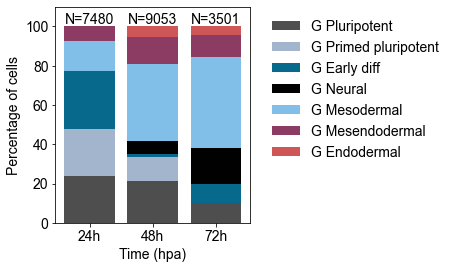

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

bottoms = np.array([0.,0.,0.])
for j,t in enumerate(anlastype):
    vals = np.array([0.,0.,0.])
    for i,st in enumerate(['24h','48h','72h']):
        if t in list(s[st].index):
            vals[i] = s[st][t]
        else:
            vals[i] = 0.
    ax.bar([0,1,2],vals,bottom=bottoms,label=t,color=colorsanlas[t])
    bottoms += vals    
    
#     for i,st in enumerate(['24h','48h','72h']):
#     bottoms=0
#     for j,t in enumerate(anlastype_order):
#         if t in list(s[st].index):
#             if i==1:
#                 ax.bar(i,s[st][t],bottom=bottom,label=t,color=ca[j])
#             else:
#                 ax.bar(i,s[st][t],bottom=bottom,color=ca[j])
#             bottom += s[st][t]
# #             ax.text(i, bottom, "%.1f"%yval, ha="center", va="center")
            
for i,st in enumerate(['24h','48h','72h']):
    ax.text(i, 100., "N=%d"%len(df2[df2.stage==st]), ha="center", va="bottom")
    
ax.set_ylim(0,110)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['24h','48h','72h'])
ax.set_xlabel('Time (hpa)')
ax.set_ylabel('Percentage of cells')
ax.legend(frameon=False, bbox_to_anchor=(1.05,1))

plt.savefig(os.path.join(folder,'stacked_histo_GastruloidFates.png'), bbox_inches='tight', pad_inches=0.02, dpi=300)

# All cell types

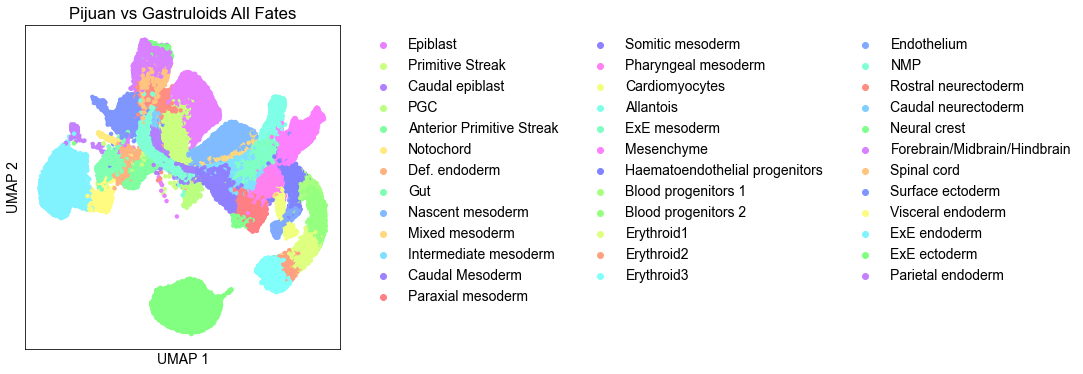

In [17]:
fig, ax = plt.subplots(figsize=(25,6))
fig.subplots_adjust(left=0.15, right=0.325, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype_pijuan', 
                hue_order=pijuantype_detailed,
                palette = colorspijuan_detailed,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids All Fates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1), ncol=3)

fig.savefig(os.path.join(folder,'pijuanFateDetailed.png'), dpi=600)

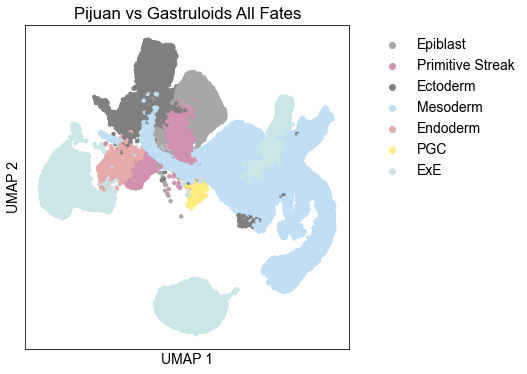

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=pijuantype_simplified,
                palette = colorspijuan_simplified,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids All Fates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFateSimplified.png'), dpi=600)

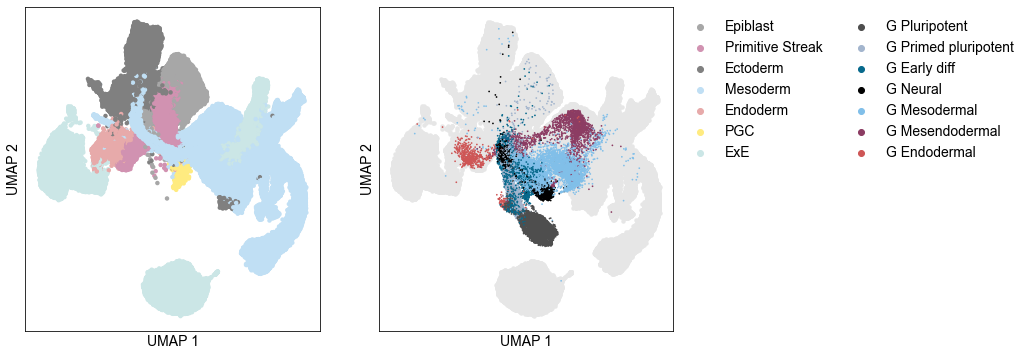

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=pijuantype_simplified,
                palette = colorspijuan_simplified,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[0],
                rasterized=True
               )
ax[0].set_xlabel('UMAP 1')
ax[0].set_ylabel('UMAP 2')

ax[0].set_xticks([])
ax[0].set_yticks([])

# ax[0].set_title('Pijuan vs Gastruloids All Fates')

ax[0].legend(frameon=False,bbox_to_anchor=(2.75, 1))

# fig.savefig(os.path.join(folder,'pijuanFateSimplified.png'), dpi=600)

##################################################

df2 = df[df.dataset=='anlas']

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                color=lighten_color('gray',0.2),
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[1],
                rasterized=True
               )
sns.scatterplot(data=df2, x='V1', y='V2',
                s=3,
                hue='celltype', 
                hue_order=anlastype,
                palette = colorsanlas,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[1],
                rasterized=True
               )
ax[1].set_xlabel('UMAP 1')
ax[1].set_ylabel('UMAP 2')

ax[1].set_xticks([])
ax[1].set_yticks([])

# ax[1].set_title('Pijuan vs Gastruloids All Fates')

ax[1].legend(frameon=False,bbox_to_anchor=(2.2, 1.))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateCombined.png'), dpi=600)

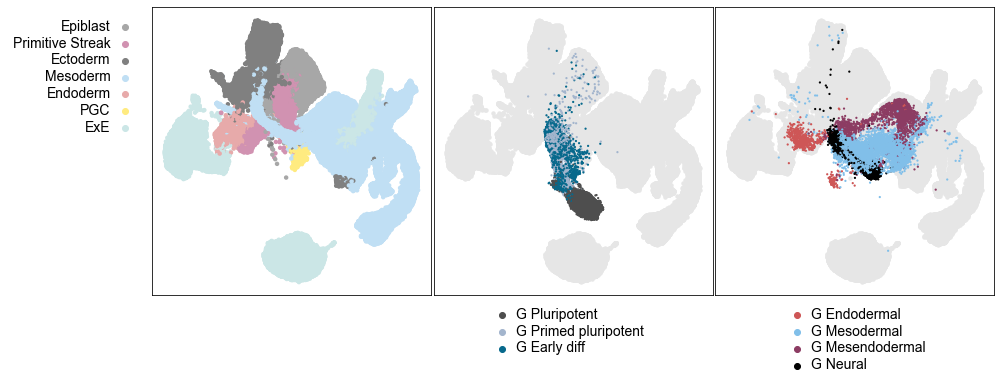

In [20]:
   
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,5))
fig.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1,hspace=0.01,wspace=0.01)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=pijuantype_simplified,
                palette = colorspijuan_simplified,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[0],
                rasterized=True
               )
ax[0].set_xlabel('UMAP 1')
ax[0].set_ylabel('UMAP 2')

ax[0].set_xticks([])
ax[0].set_yticks([])

# ax[0].set_title('Pijuan vs Gastruloids All Fates')

ax[0].legend(frameon=False,bbox_to_anchor=(2.75, 1))

#########################################

for a in ax[1:]:
    sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
#                 hue='celltype', 
#                 hue_order=mousetype_order,
#                 palette = cp,
                color=lighten_color('gray',0.2),
                linewidth=0, alpha=1., 
                ax=a,
                rasterized=True)


df2 = df[(df.dataset=='anlas')&
         ((df.celltype=='G Pluripotent')|
          (df.celltype=='G Primed pluripotent')|
          (df.celltype=='G Early diff'))]
sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
                hue='celltype', 
                hue_order=['G Pluripotent','G Primed pluripotent','G Early diff'],
                palette = colorsanlas,
                linewidth=0, alpha=1., 
                ax=ax[1],
                rasterized=True)

df2 = df[(df.dataset=='anlas')&
         ((df.celltype=='G Endodermal')|
          (df.celltype=='G Mesodermal')|
          (df.celltype=='G Mesendodermal')|
          (df.celltype=='G Neural'))]
sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
                hue='celltype',
                color='k',
                hue_order=['G Endodermal','G Mesodermal','G Mesendodermal','G Neural'],
                palette = colorsanlas,
                linewidth=0, alpha=1., 
                ax=ax[2],
                rasterized=True)

for a in ax:
    a.set_xlabel('')
    a.set_ylabel('')

    a.set_xticks([])
    a.set_yticks([])

    # ax.set_title('Pijuan vs Gastruloids Pluripotent')

    # plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))
    a.get_legend().remove()

ax[0].legend(frameon=False,bbox_to_anchor=(0., 1.),markerfirst=False,handletextpad=0.05,labelspacing=.2)
ax[1].legend(frameon=False,bbox_to_anchor=(0.8, 0.),handletextpad=0.05,labelspacing=.2)
ax[2].legend(frameon=False,bbox_to_anchor=(0.8, 0.),handletextpad=0.05,labelspacing=.2)
    
fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateSeparated.pdf'), dpi=600)

# Anlas Stage

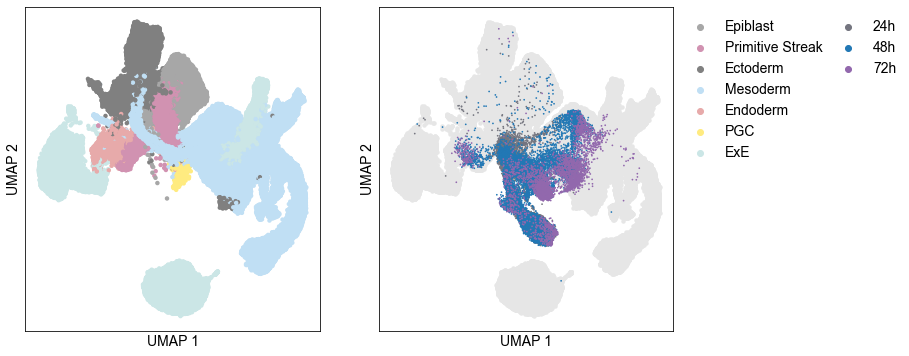

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=pijuantype_simplified,
                palette = colorspijuan_simplified,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[0],
                rasterized=True
               )
ax[0].set_xlabel('UMAP 1')
ax[0].set_ylabel('UMAP 2')

ax[0].set_xticks([])
ax[0].set_yticks([])

# ax[0].set_title('Pijuan vs Gastruloids All Fates')

ax[0].legend(frameon=False,bbox_to_anchor=(2.75, 1))

# fig.savefig(os.path.join(folder,'pijuanFateSimplified.png'), dpi=600)

##################################################

df2 = df[df.dataset=='anlas']

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
#                 hue='celltype', 
#                 hue_order=mousetype_order,
#                 palette = cp,
                color=lighten_color('gray',0.2),
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[1],
                rasterized=True
               )

g2 = sns.scatterplot(data=df[(df.dataset=='anlas')], x='V1', y='V2',
                s=3.,
                hue='stage_anlas',
                palette = colorsanlas_stage,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[1],
                rasterized=True)
ax[1].set_xlabel('UMAP 1')
ax[1].set_ylabel('UMAP 2')

ax[1].set_xticks([])
ax[1].set_yticks([])

# ax[1].set_title('Pijuan vs Gastruloids All Fates')

ax[1].legend(frameon=False,bbox_to_anchor=(1.8, 1.))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrStageCombined.pdf'), dpi=600)


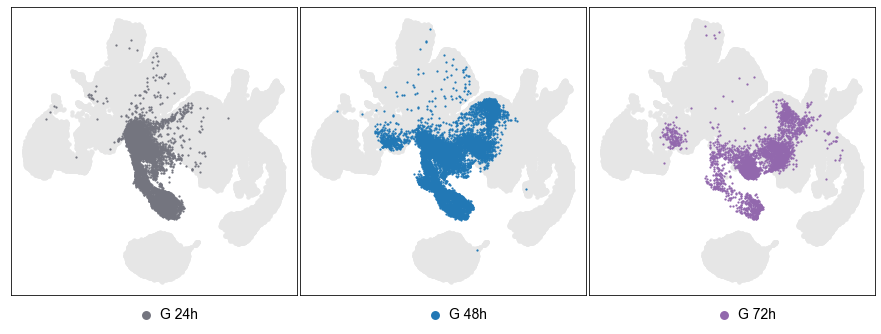

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,wspace=0.01)

for a in ax:
    g1 = sns.scatterplot(data=df1, x='V1', y='V2',
                    s=20,
#                     hue='celltype', 
#                     hue_order=mousetype_order,
#                     palette = cp,
                    color=lighten_color('gray',0.2),
                    linewidth=0, alpha=1., 
                    ax=a,
                    rasterized=True)

################

df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='24h')]    
g2 = sns.scatterplot(data=df2, x='V1', y='V2',
                    s=5,
    #                 hue='replicate',
                    color = colorsanlas_stage['24h'],
                    linewidth=0, alpha=1.,
                    edgecolors='none',
                    ax=ax[0],
                    rasterized=True,
                    label='G 24h')

################

df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='48h')]
g3 = sns.scatterplot(data=df2, x='V1', y='V2',
                    s=5,
    #                 hue='replicate',
                    color = colorsanlas_stage['48h'],
                    linewidth=0, alpha=1., 
                    ax=ax[1],
                    rasterized=True,
                    label='G 48h') 

################

df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='72h')]
g4 = sns.scatterplot(data=df2, x='V1', y='V2',
                    s=5,
    #                 hue='replicate',
                    color = colorsanlas_stage['72h'],
                    linewidth=0, alpha=1., 
                    ax=ax[2],
                    rasterized=True,
                    label='G 72h') 

for a in ax:
    a.set_xlabel('')
    a.set_ylabel('')

    a.set_xticks([])
    a.set_yticks([])

    # ax.set_title('Pijuan vs Gastruloids24h')

    a.legend(frameon=False,bbox_to_anchor=(1.05, 1))
    a.get_legend().remove()

# handles, labels = [(a + b + c) for a, b, c in zip(ax[0].get_legend_handles_labels(), 
#                                            ax[1].get_legend_handles_labels(),
#                                            ax[2].get_legend_handles_labels())]
# ax[0].legend(handles, labels, loc=3, frameon=False, markerscale=4)

ax[0].legend(frameon=False,bbox_to_anchor=(0.7, 0.),handletextpad=0.05,labelspacing=.2, markerscale=4)
ax[1].legend(frameon=False,bbox_to_anchor=(0.7, 0.),handletextpad=0.05,labelspacing=.2, markerscale=4)
ax[2].legend(frameon=False,bbox_to_anchor=(0.7, 0.),handletextpad=0.05,labelspacing=.2, markerscale=4)

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrStageSeparated.pdf'), dpi=600)

# Use nearest neighbor cells

In [23]:
corrected = pd.read_csv(os.path.join(folder,'integration.csv'))

In [24]:
pijuan_idx = ['cell' in i for i in corrected.index]

In [25]:
corrected_pijuan = corrected[pijuan_idx]
corrected_anlas = corrected[[not i for i in pijuan_idx]]

meta_pijuan = meta[pijuan_idx]
meta_anlas = meta[[not i for i in pijuan_idx]]

In [26]:
import pickle
from sklearn.neighbors import NearestNeighbors
if not os.path.exists(os.path.join(folder,'kNN.pickle')):
    print('Training and Saving NN model')
    nbrs = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(corrected_pijuan)
    pickle.dump(nbrs, open(os.path.join(folder,'kNN.pickle'),'wb'))
    
else:
    print('Loading NN model')
    nbrs = pickle.load(open(os.path.join(folder,'kNN.pickle'),'rb'))

if not os.path.exists(os.path.join(folder,'mapped_cells.pickle')):
    print('Computing neighbors and saving')
    distances, indices = nbrs.kneighbors(corrected_anlas)
    pickle.dump([distances,indices], open(os.path.join(folder,'mapped_cells.pickle'),'wb'))
else:
    print('Loading neighbors and saving')
    distances, indices = pickle.load(open(os.path.join(folder,'mapped_cells.pickle'),'rb'))

### select only the first N closest cells
# distances = distances[:,:1]
# indices = indices[:,:1]


Loading NN model
Loading neighbors and saving


In [27]:
dist = np.mean(distances,1)

d = pd.DataFrame({'distance':dist,'gtype':list(meta_anlas.celltype)})
score = []
for i in tqdm.tqdm(range(indices.shape[0])):
    score.append(100*np.sum(df.iloc[indices[i,:]].celltype.values==df.iloc[indices[i,:]].celltype.values[0])/30)
d['score'] = score
 

100%|███████████████████████████████████████████████████████████████████████████| 20034/20034 [00:21<00:00, 932.08it/s]


In [28]:
cells = df[df.dataset=='pijuan'].iloc[list(indices[:,0])]
cells['type_anlas'] = list(df[df.dataset=='anlas'].celltype)
cells['stage_anlas'] = list(df[df.dataset=='anlas'].stage)
cells = cells.reset_index()   

In [29]:
cells

,level_0,index,V1,V2,cellname,celltype,batch_ident,celltype_anlas,celltype_pijuan,stage_pijuan,stage_anlas,dataset,cellname,replicate,stage,type_anlas
0,75242,cell_75243,-0.727116,3.096657,cell_75243,Epiblast,pijuan_E7.25_sample27,None,Epiblast,E7.25,24h,pijuan,cell_75243,None,E7.25,G Early diff
1,109033,cell_109034,-4.097011,1.925291,cell_109034,Epiblast,pijuan_E8.0_sample35,None,Caudal epiblast,E8.0,24h,pijuan,cell_109034,None,E8.0,G Early diff
2,16856,cell_16857,-5.060112,2.777144,cell_16857,Epiblast,pijuan_E7.75_sample12,None,Caudal epiblast,E7.75,24h,pijuan,cell_16857,None,E7.75,G Primed pluripotent
3,794,cell_795,0.590086,5.371597,cell_795,Ectoderm,pijuan_E7.5_sample3,None,Rostral neurectoderm,E7.5,24h,pijuan,cell_795,None,E7.5,G Pluripotent
4,36097,cell_36098,-2.340126,-4.147749,cell_36098,Epiblast,pijuan_E6.5_sample18,None,Epiblast,E6.5,24h,pijuan,cell_36098,None,E6.5,G Pluripotent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20029,46680,cell_46681,-4.888255,3.339167,cell_46681,Ectoderm,pijuan_mixed_gastrulation_sample21,None,Surface ectoderm,mixed_gastrulation,72h,pijuan,cell_46681,None,mixed_gastrulation,G Early diff
20030,19110,cell_19111,9.015001,1.806298,cell_19111,ExE,pijuan_E7.75_sample13,None,ExE mesoderm,E7.75,72h,pijuan,cell_19111,None,E7.75,G Mesodermal
20031,62708,cell_62709,6.714850,-0.095154,cell_62709,ExE,pijuan_E8.25_sample25,None,ExE mesoderm,E8.25,72h,pijuan,cell_62709,None,E8.25,G Mesodermal
20032,50107,cell_50108,7.016412,1.565397,cell_50108,Mesoderm,pijuan_mixed_gastrulation_sample22,None,Mixed mesoderm,mixed_gastrulation,72h,pijuan,cell_50108,None,mixed_gastrulation,G Mesendodermal


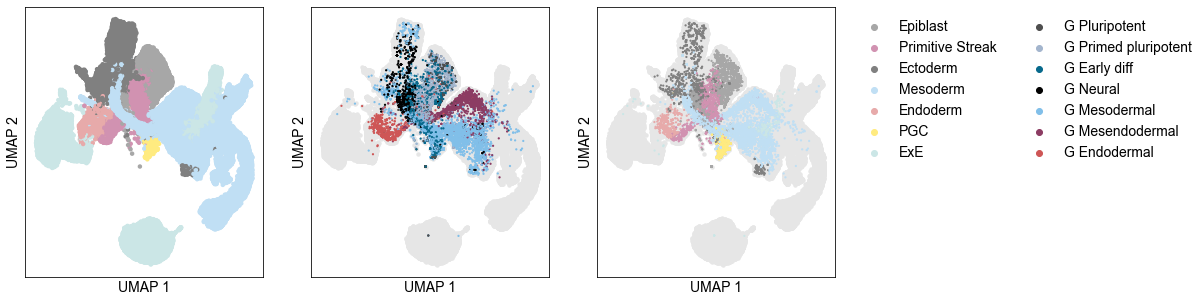

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(25,5))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

df2 = df[df.dataset=='anlas']

g1 = sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=pijuantype_simplified,
                palette = colorspijuan_simplified,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[0],
                rasterized=True,
               )

######################

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                color=lighten_color('gray',0.2),
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[1],
                rasterized=True
               )
g2 = sns.scatterplot(data=cells, x='V1', y='V2',
                s=5,
                hue='type_anlas',
                hue_order=anlastype,
                palette=colorsanlas,
                linewidth=0, alpha=1.,
                edgecolors='none',
                ax=ax[1],
                rasterized=True)

#####################

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                color=lighten_color('gray',0.2),
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax[2],
                rasterized=True
               )
sns.scatterplot(data=cells, x='V1', y='V2',
                s=5,
                hue='celltype',
                hue_order=pijuantype_simplified,
                palette=colorspijuan_simplified,#[lighten_color(i,2) for i in cp],
                linewidth=0, alpha=1.,
                edgecolors='none',
                ax=ax[2],
                rasterized=True)

####################

for a in ax:
    a.set_xlabel('UMAP 1')
    a.set_ylabel('UMAP 2')

    a.set_xticks([])
    a.set_yticks([])

    # ax[2].set_title('Pijuan vs Gastruloids All Fates')

    # ax[2].legend(frameon=False,bbox_to_anchor=(1.05, 1))
    a.get_legend().remove()

handles, labels = [(a + b) for a, b in zip(ax[0].get_legend_handles_labels(), 
                                           ax[1].get_legend_handles_labels())]
ax[2].legend(handles, labels, bbox_to_anchor=(1.05,1), frameon=False, markerscale=1, ncol=2)

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateLabelTransfer.png'), dpi=600)

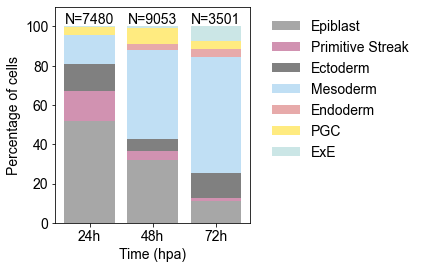

In [31]:
simplified = True

if not simplified:
    s = cells.groupby('stage_anlas')['celltype_pijuan'].value_counts(normalize=True).mul(100)
    type_loop = pijuantype_detailed
    c_loop = colorspijuan_detailed
    ncol = 4
else:
    s = cells.groupby('stage_anlas')['celltype'].value_counts(normalize=True).mul(100)
    type_loop = pijuantype_simplified
    c_loop = colorspijuan_simplified
    ncol = 1

fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

bottoms = np.array([0.,0.,0.])
for j,t in enumerate(type_loop):
    vals = np.array([0.,0.,0.])
    for i,st in enumerate(['24h','48h','72h']):
        if t in list(s[st].index):
            vals[i] = s[st][t]
        else:
            vals[i] = 0.
    ax.bar([0,1,2],vals,bottom=bottoms,label=t,color=c_loop[t])
    bottoms += vals
    
#     for i,st in enumerate(['24h','48h','72h']):
#     bottoms=0
#     for j,t in enumerate(anlastype_order):
#         if t in list(s[st].index):
#             if i==1:
#                 ax.bar(i,s[st][t],bottom=bottom,label=t,color=ca[j])
#             else:
#                 ax.bar(i,s[st][t],bottom=bottom,color=ca[j])
#             bottom += s[st][t]
# #             ax.text(i, bottom, "%.1f"%yval, ha="center", va="center")
            
for i,st in enumerate(['24h','48h','72h']):
    ax.text(i, 100., "N=%d"%len(cells[cells.stage_anlas==st]), ha="center", va="bottom")
    
ax.set_ylim(0,110)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['24h','48h','72h'])
ax.set_xlabel('Time (hpa)')
ax.set_ylabel('Percentage of cells')
ax.legend(frameon=False, bbox_to_anchor=(1.05,1), ncol=ncol)

plt.savefig(os.path.join(folder,'histoFate_labelTransfer.png'), bbox_inches='tight', pad_inches=0.02, dpi=300)

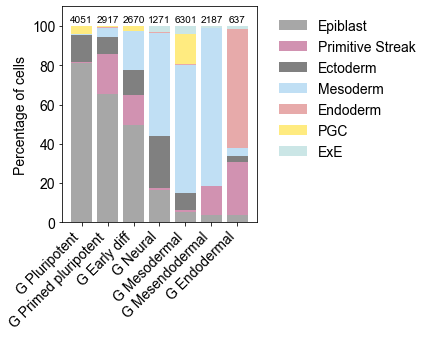

In [32]:
simplified = True

if not simplified:
    s = cells.groupby('type_anlas')['celltype_pijuan'].value_counts(normalize=True).mul(100)
    type_loop = pijuantype_detailed
    c_loop = colorspijuan_detailed
    ncol = 4
else:
    s = cells.groupby('type_anlas')['celltype'].value_counts(normalize=True).mul(100)
    type_loop = pijuantype_simplified
    c_loop = colorspijuan_simplified
    ncol = 1

fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

bottoms = np.array([0. for i in anlastype])
for j,t in enumerate(type_loop):
    vals = np.array([0. for i in anlastype])
    for i,st in enumerate(anlastype):
        if t in list(s[st].index):
            vals[i] = s[st][t]
        else:
            vals[i] = 0.
    ax.bar(range(len(anlastype)),vals,bottom=bottoms,label=t,color=c_loop[t])
    bottoms += vals
    
#     for i,st in enumerate(['24h','48h','72h']):
#     bottoms=0
#     for j,t in enumerate(anlastype_order):
#         if t in list(s[st].index):
#             if i==1:
#                 ax.bar(i,s[st][t],bottom=bottom,label=t,color=ca[j])
#             else:
#                 ax.bar(i,s[st][t],bottom=bottom,color=ca[j])
#             bottom += s[st][t]
# #             ax.text(i, bottom, "%.1f"%yval, ha="center", va="center")
            
for i,st in enumerate(anlastype):
    ax.text(i, 101., "%d"%len(cells[cells.type_anlas==st]), ha="center", va="bottom", fontsize=10)
    
ax.set_ylim(0,110)
ax.set_xticks(range(len(anlastype)))
ax.set_xticklabels(anlastype, rotation=45, ha='right')
# ax.set_xlabel('Time (hpa)')
ax.set_ylabel('Percentage of cells')
ax.legend(frameon=False, bbox_to_anchor=(1.05,1), ncol=ncol)

plt.savefig(os.path.join(folder,'histoFate_correspondence.png'), bbox_inches='tight', pad_inches=0.02, dpi=300)

Text(0.5, 0, 'Gastruloid cell type')

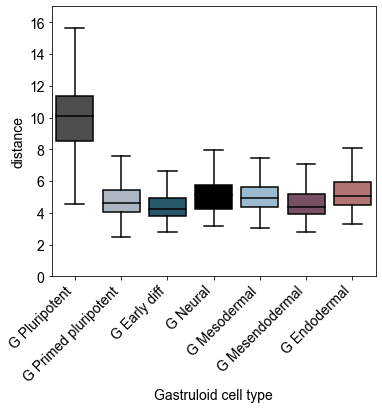

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)
sns.boxplot(data=d, y="distance", x="gtype", ax=ax, palette=colorsanlas,
               order=anlastype, saturation=0.5, showfliers=False)
ax.set_xticklabels(anlastype, rotation=45, ha='right')
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
ax.set_ylim(0,17)
ax.set_xlabel('Gastruloid cell type')

Text(0.5, 0, 'Gastruloid cell type')

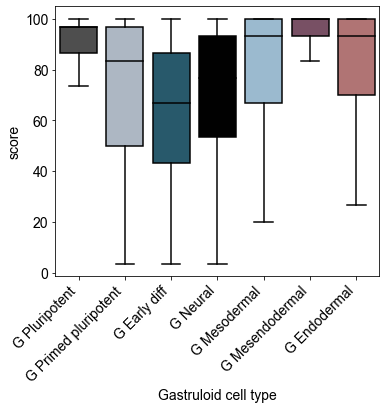

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)
sns.boxplot(data=d, y="score", x="gtype", ax=ax, palette=colorsanlas,
               order=anlastype, showfliers = False, saturation=0.5)
ax.set_xticklabels(anlastype, rotation=45, ha='right')
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
# ax.set_ylim(0,100)
ax.set_xlabel('Gastruloid cell type')

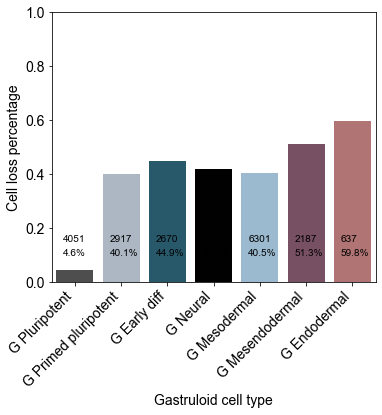

In [35]:
# cells lost
loss = []
n_gcs = []
n_mcs = []
for ct in anlastype:
    n_gc = len(indices[meta_anlas.celltype==ct,0])
    n_mc = len(set(indices[meta_anlas.celltype==ct,0]))
#     print(ct,n_gc,n_mc,'%.5f'%(n_mc/n_gc))
    loss.append(n_mc/n_gc)
    n_mcs.append(n_mc)
    n_gcs.append(n_gc)

d = pd.DataFrame({'celltype':anlastype,'loss':loss})

fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)
sns.barplot(data=d, y="loss", x="celltype", ax=ax, palette=colorsanlas,
               order=anlastype, saturation=0.5)
ax.set_xticklabels(anlastype, rotation=45, ha='right')
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
ax.set_ylim(0,1)
ax.set_xlabel('Gastruloid cell type')
ax.set_ylabel('Cell loss percentage')

for i in range(len(n_gcs)):
    ax.text(-0.25+i,0.1,'%.1f%%'%(100*n_mcs[i]/n_gcs[i]), fontsize=10)
    ax.text(-0.25+i,0.15,'%d'%(n_gcs[i]), fontsize=10)
    
    